In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time
import datetime

In [3]:

listings_data = pd.read_csv('listings_amsterdam.csv')

reviews_data = pd.read_csv('reviews_amsterdam.csv')

In [4]:
listings_data.shape

(5402, 74)

In [5]:
listings_data.dtypes

id                                                int64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [6]:
listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,2.021110e+13,04-11-2021,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,4.98,4.68,4.81,0363 5F3A 5684 6750 D14D,t,1,0,1,0,2.83
1,20168,https://www.airbnb.com/rooms/20168,2.021110e+13,04-11-2021,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,3.57
2,27886,https://www.airbnb.com/rooms/27886,2.021110e+13,04-11-2021,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,4.92,4.90,4.80,0363 974D 4986 7411 88D8,t,1,0,1,0,2.13
3,28871,https://www.airbnb.com/rooms/28871,2.021110e+13,04-11-2021,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,4.94,4.97,4.82,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.62
4,29051,https://www.airbnb.com/rooms/29051,2.021110e+13,04-11-2021,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,...,4.90,4.86,4.75,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,5.52


In [7]:
reviews_data.shape

(266861, 6)

In [8]:
reviews_data.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191.0,30-03-2009,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771.0,24-04-2009,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989.0,03-05-2009,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797.0,18-05-2009,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151.0,25-05-2009,17977,Sherwin,Daniel is highly recommended. He provided all...


In [4]:
# merging listing and reviews data

dataframe= pd.merge(reviews_data, listings_data[['neighbourhood_cleansed', 'host_id', 'latitude','longitude', 'number_of_reviews', 'id', 'property_type','review_scores_communication','review_scores_location','review_scores_value','review_scores_cleanliness','review_scores_checkin','review_scores_rating','review_scores_accuracy']], 
              left_on='listing_id', right_on='id', how='left')

dataframe.rename(columns = {'id_x':'id', 'neighbourhood_cleansed':'neighbourhood_group'}, inplace=True)
dataframe.drop(['id_y'], axis=1, inplace=True)

In [5]:
dataframe.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,review_scores_communication,review_scores_location,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy
0,2818,1191.0,30-03-2009,10952,Lam,Daniel is really cool. The place was nice and ...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93
1,2818,1771.0,24-04-2009,12798,Alice,Daniel is the most amazing host! His place is ...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93
2,2818,1989.0,03-05-2009,11869,Natalja,We had such a great time in Amsterdam. Daniel ...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93
3,2818,2797.0,18-05-2009,14064,Enrique,Very professional operation. Room is very clea...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93
4,2818,3151.0,25-05-2009,17977,Sherwin,Daniel is highly recommended. He provided all...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93


In [11]:
dataframe.shape

(266861, 19)

In [12]:
#count missing values
dataframe['comments'].isnull().sum()

239

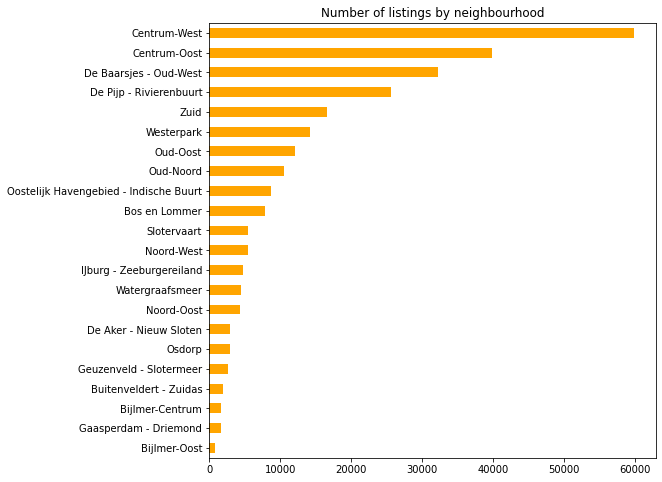

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
dataframe['neighbourhood_group'].value_counts().sort_values(ascending=True).plot.barh(x='neighbourhood_group',
                      y='count',
                      ax=ax,
                      color="orange")

ax.set_title("Number of listings by neighbourhood")

plt.show()

In [13]:
# group by hosts and count the number of unique listings --> cast it to a dataframe
properties_per_host = pd.DataFrame(dataframe.groupby('host_id')['listing_id'].nunique())

# sort unique values descending and show the Top20
properties_per_host.sort_values(by=['listing_id'], ascending=False, inplace=True)
properties_per_host.head(20)

,listing_id
host_id,
14574533,21
203731852,20
405910842,19
178187873,19
67005410,16
245267147,12
21167882,11
5796250,10
22879651,10


In [15]:
top1_host = dataframe.host_id == 14574533
dataframe[top1_host].neighbourhood_group.value_counts()

pd.DataFrame(dataframe[top1_host].groupby('neighbourhood_group')['listing_id'].nunique())

,listing_id
neighbourhood_group,
De Baarsjes - Oud-West,21


In [16]:
pd.DataFrame(dataframe[top1_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Private room in bed and breakfast,20
Room in boutique hotel,1


In [17]:
top2_host = dataframe.host_id == 203731852
dataframe[top2_host].neighbourhood_group.value_counts()

pd.DataFrame(dataframe[top2_host].groupby('neighbourhood_group')['listing_id'].nunique())

,listing_id
neighbourhood_group,
Centrum-Oost,4
Centrum-West,1
De Baarsjes - Oud-West,3
De Pijp - Rivierenbuurt,1
IJburg - Zeeburgereiland,1
Noord-Oost,1
Oud-Noord,3
Westerpark,4
Zuid,2


In [18]:
pd.DataFrame(dataframe[top2_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Entire serviced apartment,4
Room in serviced apartment,16


In [19]:
top3_host = dataframe.host_id == 405910842
dataframe[top3_host].neighbourhood_group.value_counts()

pd.DataFrame(dataframe[top3_host].groupby('neighbourhood_group')['listing_id'].nunique())

,listing_id
neighbourhood_group,
Centrum-Oost,13
Centrum-West,5
De Baarsjes - Oud-West,1


In [20]:
pd.DataFrame(dataframe[top3_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Entire serviced apartment,7
Room in boutique hotel,12


# Preprocessing

In [21]:
dataframe.isna().sum()

listing_id                       0
id                               0
date                             0
reviewer_id                      0
reviewer_name                    0
comments                       239
neighbourhood_group              0
host_id                          0
latitude                         0
longitude                        0
number_of_reviews                0
property_type                    0
review_scores_communication     11
review_scores_location          11
review_scores_value             11
review_scores_cleanliness       11
review_scores_checkin           11
review_scores_rating             0
review_scores_accuracy          11
dtype: int64

In [22]:
dataframe.dropna(inplace=True)
dataframe.isna().sum()

listing_id                     0
id                             0
date                           0
reviewer_id                    0
reviewer_name                  0
comments                       0
neighbourhood_group            0
host_id                        0
latitude                       0
longitude                      0
number_of_reviews              0
property_type                  0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_rating           0
review_scores_accuracy         0
dtype: int64

In [7]:
dataframe.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,review_scores_communication,review_scores_location,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy
0,2818,1191.0,30-03-2009,10952,Lam,Daniel is really cool. The place was nice and ...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93
1,2818,1771.0,24-04-2009,12798,Alice,Daniel is the most amazing host! His place is ...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93
2,2818,1989.0,03-05-2009,11869,Natalja,We had such a great time in Amsterdam. Daniel ...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93
3,2818,2797.0,18-05-2009,14064,Enrique,Very professional operation. Room is very clea...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93
4,2818,3151.0,25-05-2009,17977,Sherwin,Daniel is highly recommended. He provided all...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93


In [22]:
D=dataframe.groupby('neighbourhood_group')["review_scores_rating"].describe().transpose()
D.head()


neighbourhood_group,Bijlmer-Centrum,Bijlmer-Oost,Bos en Lommer,Buitenveldert - Zuidas,Centrum-Oost,Centrum-West,De Aker - Nieuw Sloten,De Baarsjes - Oud-West,De Pijp - Rivierenbuurt,Gaasperdam - Driemond,...,Noord-Oost,Noord-West,Oostelijk Havengebied - Indische Buurt,Osdorp,Oud-Noord,Oud-Oost,Slotervaart,Watergraafsmeer,Westerpark,Zuid
count,1689.000000,762.000000,7816.000000,1944.000000,39917.000000,59971.000000,2996.000000,32266.000000,25709.000000,1620.000000,...,4339.000000,5429.000000,8649.000000,2903.000000,10542.000000,12060.000000,5479.000000,4517.000000,14220.000000,16662.000000
mean,4.718561,4.787822,4.780376,4.771975,4.794484,4.778077,4.822427,4.780796,4.806094,4.647333,...,4.815285,4.784419,4.787634,4.746121,4.775009,4.771385,4.742610,4.809424,4.801300,4.776328
std,0.232955,0.144321,0.163566,0.236241,0.168293,0.173655,0.118017,0.185388,0.155045,0.177979,...,0.163696,0.153894,0.213661,0.114384,0.177416,0.183192,0.170791,0.163336,0.147819,0.166787
min,4.000000,4.250000,3.750000,0.000000,0.000000,2.750000,4.000000,0.000000,0.000000,4.230000,...,4.330000,3.000000,0.000000,4.000000,0.000000,3.330000,4.000000,0.000000,3.000000,2.000000
25%,4.690000,4.800000,4.710000,4.740000,4.730000,4.700000,4.720000,4.700000,4.730000,4.570000,...,4.750000,4.690000,4.740000,4.680000,4.670000,4.630000,4.640000,4.780000,4.730000,4.700000


In [29]:

df = dataframe.groupby(['neighbourhood_group']).mean()['review_scores_rating']

df.sort_values()

neighbourhood_group
Gaasperdam - Driemond                     4.647333
Bijlmer-Centrum                           4.718561
Slotervaart                               4.742610
Osdorp                                    4.746121
Geuzenveld - Slotermeer                   4.750787
Oud-Oost                                  4.771385
Buitenveldert - Zuidas                    4.771975
Oud-Noord                                 4.775009
Zuid                                      4.776328
Centrum-West                              4.778077
Bos en Lommer                             4.780376
De Baarsjes - Oud-West                    4.780796
Noord-West                                4.784419
Oostelijk Havengebied - Indische Buurt    4.787634
Bijlmer-Oost                              4.787822
Centrum-Oost                              4.794484
Westerpark                                4.801300
De Pijp - Rivierenbuurt                   4.806094
Watergraafsmeer                           4.809424
Noord-Oost 

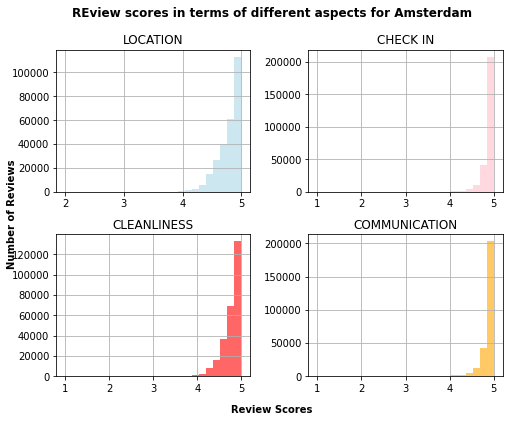

In [5]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(8,6))

# plot all 4 histograms
dataframe.hist('review_scores_location', bins=25, ax=axes[0,0], color='lightblue', alpha=0.6)
axes[0,0].set_title('LOCATION')

dataframe.hist('review_scores_checkin', bins=25, ax=axes[0,1], color='pink', alpha=0.6)
axes[0,1].set_title('CHECK IN')

dataframe.hist('review_scores_cleanliness', bins=25, ax=axes[1,0], color='red', alpha=0.6)
axes[1,0].set_title('CLEANLINESS')

dataframe.hist('review_scores_communication', bins=25, ax=axes[1,1], color='orange', alpha=0.6)
axes[1,1].set_title('COMMUNICATION')




# plot common x- and y-label
fig.text(0.5, 0.04, 'Review Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('REview scores in terms of different aspects for Amsterdam', fontsize=12, fontweight='bold');

# Word Frequency

In [28]:
import itertools
import collections

def convert(lst): 
    return ([i for item in lst for i in item.lower().split()]) 

#fill missing values with NA
all_words_review = convert(dataframe['comments'].fillna(""))

In [29]:
# WORDS ARE SPLIT TO COUNT FREQUENCY

count_word = collections.Counter(all_words_review) #Count word frequency

clean_word_count = pd.DataFrame(count_word.most_common(5),
                             columns=['words', 'count'])

clean_word_count.head()

,words,count
0,the,524864
1,and,494980
2,a,337239
3,to,304281
4,was,222760


# Removing Punctuations, Numbers, and Special Characters

In [35]:
dataframe['comments'] = dataframe['comments'].str.replace("[^a-zA-Z#]", " ")

In [37]:
dataframe.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,review_scores_communication,review_scores_location,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy,language
0,2818,1191.0,30-03-2009,10952,Lam,Daniel is really cool The place was nice and ...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93,en
1,2818,1771.0,24-04-2009,12798,Alice,Daniel is the most amazing host His place is ...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93,en
2,2818,1989.0,03-05-2009,11869,Natalja,We had such a great time in Amsterdam Daniel ...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93,en
3,2818,2797.0,18-05-2009,14064,Enrique,Very professional operation Room is very clea...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93,en
4,2818,3151.0,25-05-2009,17977,Sherwin,Daniel is highly recommended He provided all...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93,en


# removing short words

In [ ]:
#to remove all the words having length 3 or less. 
#For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [38]:
dataframe['comments'] = dataframe['comments'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

dataframe.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,review_scores_communication,review_scores_location,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy,language
0,2818,1191.0,30-03-2009,10952,Lam,Daniel really cool place nice clean Very quiet...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93,en
1,2818,1771.0,24-04-2009,12798,Alice,Daniel most amazing host place extremely clean...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93,en
2,2818,1989.0,03-05-2009,11869,Natalja,such great time Amsterdam Daniel excellent hos...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93,en
3,2818,2797.0,18-05-2009,14064,Enrique,Very professional operation Room very clean co...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93,en
4,2818,3151.0,25-05-2009,17977,Sherwin,Daniel highly recommended provided necessities...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93,en
5,2818,4748.0,29-06-2009,20192,Jie,Daniel great host made everything easy room su...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93,en
6,2818,5202.0,07-07-2009,23055,Vanessa,Daniele amazing host provided everything that ...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93,en
7,2818,9131.0,06-09-2009,26343,Katja,have nicer start Amsterdam Daniel such great w...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93,en
8,2818,12103.0,01-10-2009,40999,Marie-Eve,Daniel fantastic host place calm clean provide...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93,en
9,2818,16196.0,04-11-2009,38623,Graham,Daniel great couldn enough gone trouble added ...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,282,Private room in rental unit,4.98,4.68,4.81,5.0,4.98,4.89,4.93,en


# Tokenization

In [ ]:
#Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [55]:
tokenized_dataframe = dataframe['comments'].apply(lambda x: x.split())
tokenized_dataframe.head(10)

0    [Daniel, really, cool, place, nice, clean, Ver...
1    [Daniel, most, amazing, host, place, extremely...
2    [such, great, time, Amsterdam, Daniel, excelle...
3    [Very, professional, operation, Room, very, cl...
4    [Daniel, highly, recommended, provided, necess...
5    [Daniel, great, host, made, everything, easy, ...
6    [Daniele, amazing, host, provided, everything,...
7    [have, nicer, start, Amsterdam, Daniel, such, ...
8    [Daniel, fantastic, host, place, calm, clean, ...
9    [Daniel, great, couldn, enough, gone, trouble,...
Name: comments, dtype: object

# Stemming

In [ ]:
#Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word

In [56]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_dataframe = tokenized_dataframe.apply(lambda x: [ps.stem(i) for i in x])

tokenized_dataframe.head()

0    [daniel, realli, cool, place, nice, clean, ver...
1    [daniel, most, amaz, host, place, extrem, clea...
2    [such, great, time, amsterdam, daniel, excel, ...
3    [veri, profession, oper, room, veri, clean, co...
4    [daniel, highli, recommend, provid, necess, ac...
Name: comments, dtype: object

# Removing stopwords of no value

In [30]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [49]:
stop_words = set(stopwords.words(['english']))

# View a few words from the set
list(stop_words)[0:30]

['just',
 'have',
 'won',
 'so',
 'her',
 'were',
 'weren',
 "you'll",
 'did',
 'into',
 'mightn',
 'as',
 'do',
 'yourselves',
 'don',
 'by',
 'yours',
 'which',
 "won't",
 'down',
 'needn',
 'wasn',
 "hasn't",
 'his',
 'after',
 'again',
 'to',
 'couldn',
 'the',
 "haven't"]

In [45]:
stop_words_french = set(stopwords.words(['french']))

# View a few words from the set
list(stop_words)[0:30]

['je',
 'serions',
 'vous',
 'j',
 'sommes',
 'même',
 'êtes',
 'ayantes',
 'auraient',
 'sois',
 'eusses',
 'as',
 'moi',
 'seriez',
 'aurez',
 'ayons',
 'qu',
 'ayez',
 'fût',
 'des',
 'serez',
 'serait',
 'sa',
 'aie',
 'fussent',
 'soit',
 'que',
 'd',
 'qui',
 'ils']

In [44]:
words_review_cleaned = [word for word in all_words_review if word not in stop_words]
words_review_count = collections.Counter(words_review_cleaned)

word_review_count_df = pd.DataFrame(words_review_count.most_common(15),
                             columns=['words', 'count'])

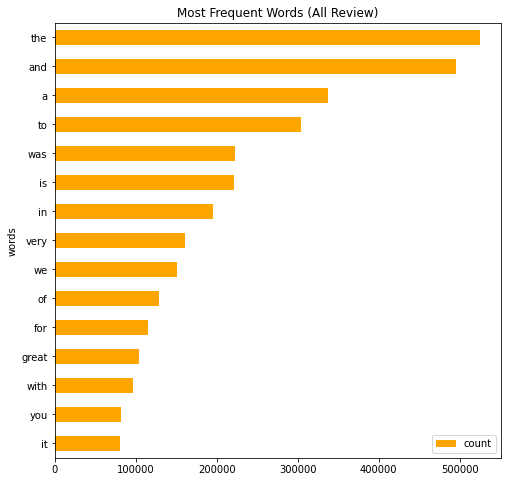

In [52]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
word_review_count_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="orange")

ax.set_title("Most Frequent Words (All Review)")

plt.show()

# language detect

In [31]:
from langdetect import detect

In [32]:
# write the function that detects the language
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [33]:
%%time 
dataframe['language'] = dataframe['comments'].apply(language_detection)

Wall time: 19min 38s


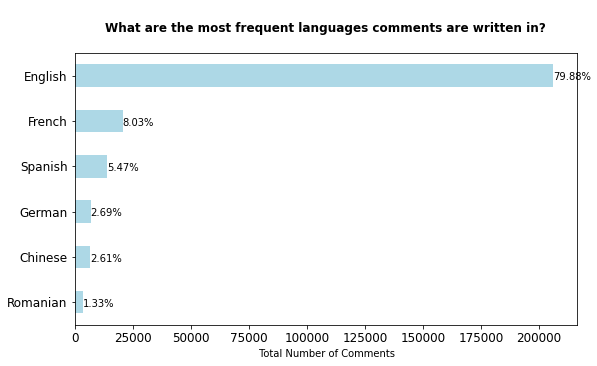

In [41]:
ax = dataframe.language.value_counts().head(6).plot(kind='barh', figsize=(9,5), color="lightblue", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent languages comments are written in?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=10)
ax.set_yticklabels(['English', 'French', 'Spanish', 'German', 'Chinese','Romanian'])

# create a list to collect the plt.patches data
totals = []
# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')
    
# invert for largest on top 
ax.invert_yaxis()

In [60]:
eng_data = dataframe[(dataframe['language']=='en')]
french_data = dataframe[(dataframe['language']=='fr')]

In [61]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [62]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [63]:
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

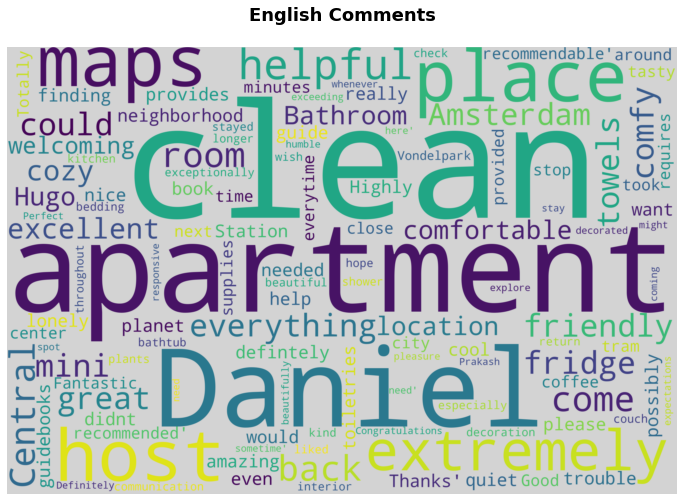

In [69]:
#WORD CLOUD FOR ENGLISH WORDS

wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(eng_data.comments.values))

plot_wordcloud(wordcloud, 'English')

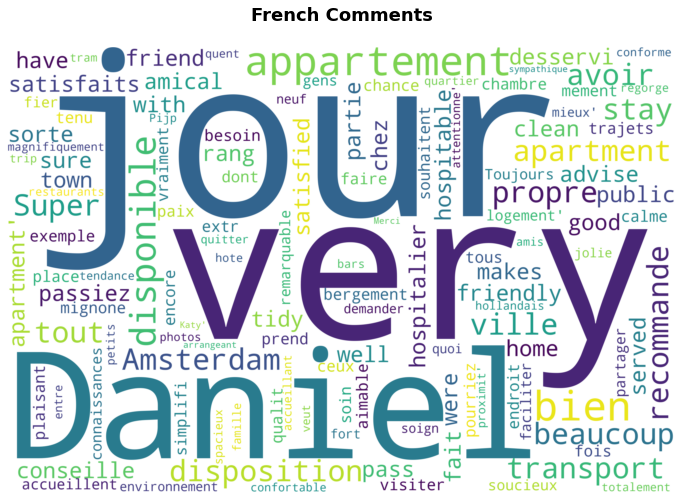

In [66]:
#WORD CLOUD FOR FRENCH WORDS

wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="white", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('french')).generate(str(french_data.comments.values))

plot_wordcloud(wordcloud, 'French')

# SENTIMENTAL ANALYSIS

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [71]:
# use the polarity_scores() method to get the sentiment metrics
def print_sentiment_scores(sentence):
    snt = SentimentIntensityAnalyzer().polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [72]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [74]:
%%time


eng_data['sentiment_neg'] = eng_data['comments'].apply(negative_score)
eng_data['sentiment_neu'] = eng_data['comments'].apply(neutral_score)
eng_data['sentiment_pos'] = eng_data['comments'].apply(positive_score)
eng_data['sentiment_compound'] = eng_data['comments'].apply(compound_score)

Wall time: 4min 55s


In [75]:
#applying sentimenatl analysis on eng commenst beacsue majority

eng_data.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,...,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,2818,1191.0,30-03-2009,10952,Lam,Daniel really cool place nice clean Very quiet...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,...,4.81,5.0,4.98,4.89,4.93,en,0.066,0.579,0.356,0.8754
1,2818,1771.0,24-04-2009,12798,Alice,Daniel most amazing host place extremely clean...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,...,4.81,5.0,4.98,4.89,4.93,en,0.000,0.511,0.489,0.9640
2,2818,1989.0,03-05-2009,11869,Natalja,such great time Amsterdam Daniel excellent hos...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,...,4.81,5.0,4.98,4.89,4.93,en,0.036,0.569,0.395,0.9722
3,2818,2797.0,18-05-2009,14064,Enrique,Very professional operation Room very clean co...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,...,4.81,5.0,4.98,4.89,4.93,en,0.000,0.366,0.634,0.9726
4,2818,3151.0,25-05-2009,17977,Sherwin,Daniel highly recommended provided necessities...,Oostelijk Havengebied - Indische Buurt,3159,52.36435,4.94358,...,4.81,5.0,4.98,4.89,4.93,en,0.000,0.641,0.359,0.9272


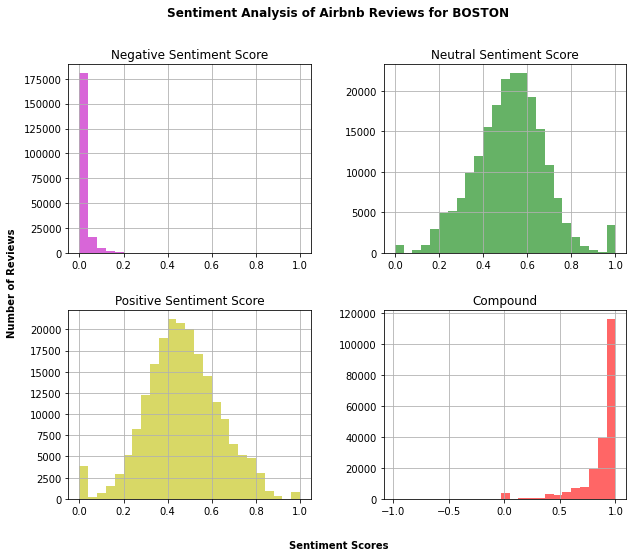

In [81]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
eng_data.hist('sentiment_neg', bins=25, ax=axes[0,0], color='m', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
eng_data.hist('sentiment_neu', bins=25, ax=axes[0,1], color='g', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
eng_data.hist('sentiment_pos', bins=25, ax=axes[1,0], color='y', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
eng_data.hist('sentiment_compound', bins=25, ax=axes[1,1], color='r', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Airbnb Reviews for BOSTON\n\n', fontsize=12, fontweight='bold');

In [82]:
eng_data.query('sentiment_pos> 0')

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,...,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,2818,1.191000e+03,30-03-2009,10952,Lam,Daniel really cool place nice clean Very quiet...,Oostelijk Havengebied - Indische Buurt,3159,52.364350,4.943580,...,4.81,5.0,4.98,4.89,4.93,en,0.066,0.579,0.356,0.8754
1,2818,1.771000e+03,24-04-2009,12798,Alice,Daniel most amazing host place extremely clean...,Oostelijk Havengebied - Indische Buurt,3159,52.364350,4.943580,...,4.81,5.0,4.98,4.89,4.93,en,0.000,0.511,0.489,0.9640
2,2818,1.989000e+03,03-05-2009,11869,Natalja,such great time Amsterdam Daniel excellent hos...,Oostelijk Havengebied - Indische Buurt,3159,52.364350,4.943580,...,4.81,5.0,4.98,4.89,4.93,en,0.036,0.569,0.395,0.9722
3,2818,2.797000e+03,18-05-2009,14064,Enrique,Very professional operation Room very clean co...,Oostelijk Havengebied - Indische Buurt,3159,52.364350,4.943580,...,4.81,5.0,4.98,4.89,4.93,en,0.000,0.366,0.634,0.9726
4,2818,3.151000e+03,25-05-2009,17977,Sherwin,Daniel highly recommended provided necessities...,Oostelijk Havengebied - Indische Buurt,3159,52.364350,4.943580,...,4.81,5.0,4.98,4.89,4.93,en,0.000,0.641,0.359,0.9272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266855,52847333,4.860410e+17,01-11-2021,72486192,Michael,Everything perfect Madelon welcomed very kind ...,Westerpark,17548478,52.382830,4.872270,...,4.00,5.0,5.00,5.00,5.00,en,0.000,0.547,0.453,0.9595
266856,52946755,4.838380e+17,29-10-2021,6392852,New,Wauw Honestly best Airbnb experience apartment...,Zuid,148342852,52.354771,4.851624,...,5.00,5.0,5.00,5.00,5.00,en,0.000,0.464,0.536,0.9909
266857,52946755,4.845830e+17,30-10-2021,95158280,Otto,Fantastic apartment very central location clos...,Zuid,148342852,52.354771,4.851624,...,5.00,5.0,5.00,5.00,5.00,en,0.000,0.476,0.524,0.9917
266858,52974738,4.853170e+17,31-10-2021,194929002,Anna,Perfect spot explore Amsterdam apartment clean...,Centrum-West,28772925,52.366280,4.880880,...,5.00,5.0,5.00,5.00,5.00,en,0.000,0.406,0.594,0.9586


In [83]:
eng_data.query('sentiment_neg > sentiment_pos')

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,...,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
9,2818,1.619600e+04,04-11-2009,38623,Graham,Daniel great couldn enough gone trouble added ...,Oostelijk Havengebied - Indische Buurt,3159,52.364350,4.943580,...,4.81,5.00,4.98,4.89,4.93,en,0.183,0.678,0.139,-0.0772
48,2818,5.151990e+05,09-09-2011,801728,Dominic,stay with Daniel enjoyable only complaint stop...,Oostelijk Havengebied - Indische Buurt,3159,52.364350,4.943580,...,4.81,5.00,4.98,4.89,4.93,en,0.197,0.673,0.130,-0.1280
301,20168,2.780218e+07,12-03-2015,27577493,Anthony,Unfortunately place when arrived started worri...,Centrum-Oost,59484,52.364070,4.893930,...,4.49,4.79,4.63,4.44,4.69,en,0.153,0.745,0.102,-0.3182
346,20168,5.232199e+07,28-10-2015,22473069,Lisa,listing described simple clean Windows that we...,Centrum-Oost,59484,52.364070,4.893930,...,4.49,4.79,4.63,4.44,4.69,en,0.216,0.711,0.073,-0.8595
385,20168,8.461578e+07,08-07-2016,20817847,Monica,When there yelled being late hour apologize tr...,Centrum-Oost,59484,52.364070,4.893930,...,4.49,4.79,4.63,4.44,4.69,en,0.155,0.804,0.042,-0.5849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266350,51084276,4.258130e+17,10-08-2021,226183169,Chris,really disappointed with almost every aspect t...,Centrum-Oost,178187873,52.364967,4.880611,...,3.64,3.82,3.91,3.64,3.36,en,0.294,0.585,0.121,-0.9348
266553,51495358,4.664220e+17,05-10-2021,6888244,Asma,That indeed short stay minutes apartment obser...,Centrum-Oost,230163762,52.372340,4.911500,...,3.17,4.00,2.67,3.50,3.33,en,0.096,0.857,0.047,-0.4234
266706,51973415,4.721960e+17,13-10-2021,280135766,Conor,bugs which guests causing allergic reaction be...,Centrum-West,37752619,52.376040,4.879930,...,3.80,3.40,4.40,3.60,4.40,en,0.071,0.929,0.000,-0.2960
266795,52332152,4.758680e+17,18-10-2021,206856535,George,location difficult discern once there Nice cen...,Centrum-Oost,140428579,52.373720,4.908940,...,4.00,3.80,4.80,3.80,3.40,en,0.187,0.685,0.128,-0.0772


In [84]:
percentiles = eng_data.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    205945.000000
mean          0.862036
std           0.200469
min          -0.982600
5%            0.475400
10%           0.634220
20%           0.812200
30%           0.874800
40%           0.910000
50%           0.934200
60%           0.950900
70%           0.963800
80%           0.974100
90%           0.983600
max           0.999300
Name: sentiment_compound, dtype: float64

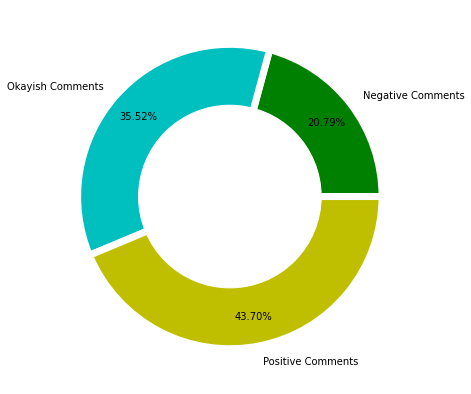

In [85]:
# assign the data
neg = percentiles['5%']
mid = percentiles['20%']
pos = percentiles['max']
names = ['Negative Comments', 'Okayish Comments','Positive Comments']
size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['g', 'c', 'y'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

In [86]:
# full dataframe with POSITIVE comments
df_pos = eng_data.loc[eng_data.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
pos_comments = df_pos['comments'].tolist()

In [87]:
# full dataframe with NEGATIVE comments
df_neg = eng_data.loc[eng_data.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['comments'].tolist()

# comparing positive and negative

In [88]:
df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

In [89]:
pos_comments[10:15]

['When reach Dainel place sure that things ready greet meticulously made room spick span bathroom well thought information Things along with relevant maps transportation schedule explore city fullest Nothing misses from Daniel radar pleasing personality with great asthetic sense just icing cake would definately stay with again Thanks again making feel home',
 'stay with Daniel truly highlights mine partner whirlwind European tour only room smashingly decorated great example modern Dutch living spotlessly clean serenely comfortable think having Daniel point reference discovering city From freely offered advice whenever questions about where what Amsterdam room located quite distance from heart city didn find this hindering were able center snap with bikes Daniel available minimal charge train stops located within stones throw front door There plenty restaurants cafes groceries area staying here also great locals living would recommend Daniel residence anyone looking smart affordable alt

In [90]:
# read some negative comments
neg_comments[10:15]

['booking stay with Edwin read reviews available made reservations based only these reviews also knowing situated busy noisy street surrounded pubs cafes Living quiet farm this just what wanted bought along plugs suggested some reviews only used them night because they were uncomfortable rest nights lull noises actually helped fall asleep',
 'usually write long reviews bear with stayed Edwin home nights price great comparing other options available room spacious enough people comfortable However bathroom small manageable doesn well Warning steep spiral steps like other places Amsterdam have suitcase would need carry well above your Also visitors after listing Edwin does mention that Mooki sweet decided spend night with skeptic first stay other guests allergic worth mentioning onto review most aggravating aspect stay that keys locks doors work properly tell trying front door minutes cold late night morning THEN another into room which bother lock after first night Repeatedly second nigh

# word cloud positive comments

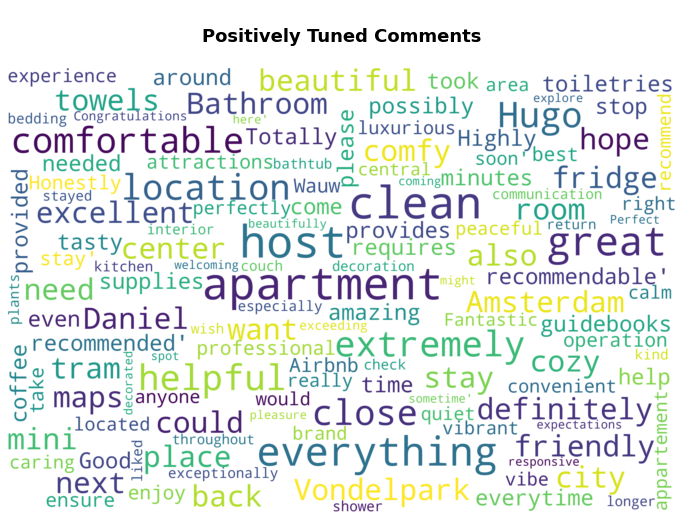

In [92]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="white",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_pos.comments.values))

plot_wordcloud(wordcloud, '\nPositively Tuned')

In [93]:
# importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

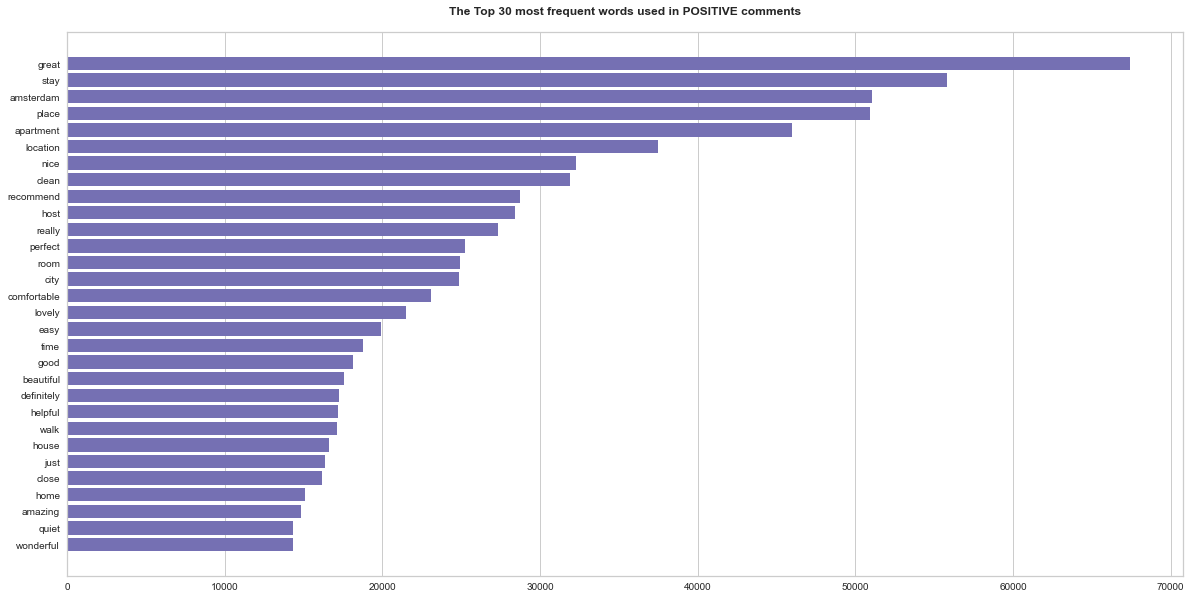

In [101]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(pos_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('dark')
plt.figure(figsize=(20,10))
plt.title('The Top 30 most frequent words used in POSITIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

# word cloud negative comments

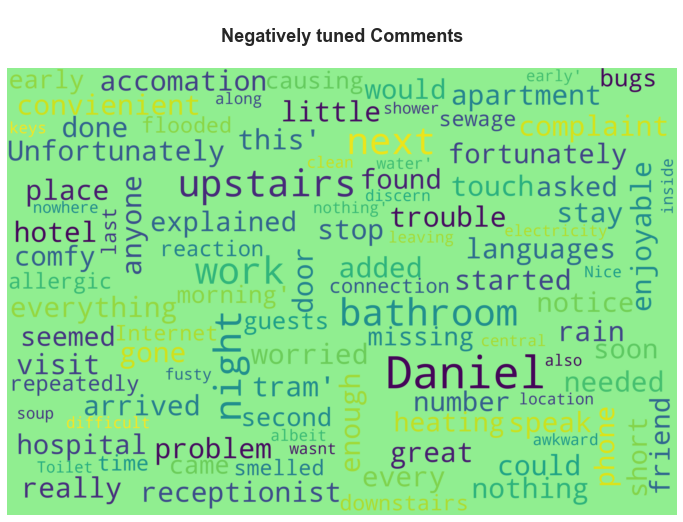

In [102]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="lightgreen",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_neg.comments.values))

plot_wordcloud(wordcloud, '\nNegatively tuned')

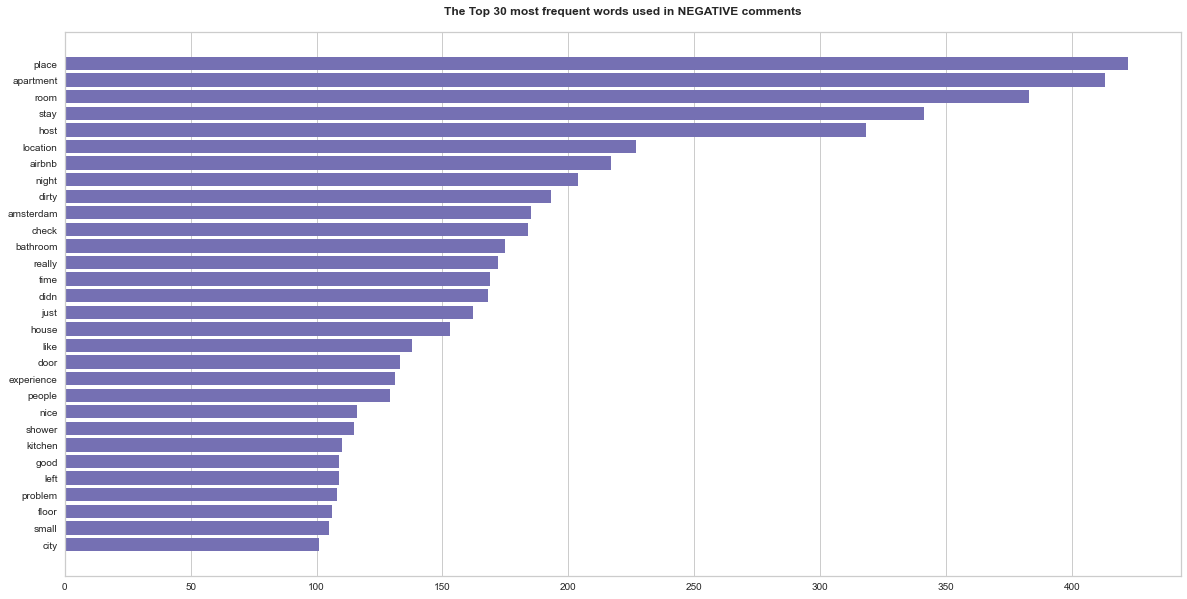

In [103]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(neg_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('dark')
plt.figure(figsize=(20,10))
plt.title('The Top 30 most frequent words used in NEGATIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

# To find the Top Hosts based on User Reviews and Top Hosts' neighbourhood


In [104]:
dataframe['comments'][0]

'Daniel really cool place nice clean Very quiet neighborhood maps lonely planet guide book room didnt have trouble finding place from Central Station would defintely come back Thanks'

In [7]:
# function to calculate the sentiments of the user reviews

def nltk_sentiment(input_text):
    score_dict = analyzer.polarity_scores(input_text)
    return score_dict['compound']

In [10]:
# testing the function

nltk_sentiment(dataframe['comments'][0])

0.8843

In [12]:
# applying the function to the whole column

dataframe['Sentiment_NLTK'] = dataframe['comments'].apply(lambda x: nltk_sentiment(str(x)))

In [13]:
# creating a new dataframe where I'm grouping the listing_id column i.e. according to the listings
# and further calculating the average of the sentiment score

reviews_avg = dataframe .groupby(['listing_id']).mean()['Sentiment_NLTK']

reviews_avg.head

<bound method NDFrame.head of listing_id
2818        0.755840
20168       0.655094
27886       0.743990
28871       0.678335
29051       0.761398
              ...   
52840207    0.721800
52847333    0.970100
52946755    0.991900
52974738    0.698050
53043715    0.716500
Name: Sentiment_NLTK, Length: 4934, dtype: float64>

# Top 5 hosts:

In [15]:
reviews_avg.nlargest()

listing_id
44497608    0.9974
35145947    0.9962
51221072    0.9958
44733441    0.9957
40044862    0.9948
Name: Sentiment_NLTK, dtype: float64

In [17]:
# listings dataset contains Detailed Listings data for Amsterdam

listings = pd.read_csv("listings_amsterdam.csv")

# calendar dataset contains Detailed Calendar Data for listings in Amsterdam



# reviews dataset contains Detailed Review Data for listings in Amsterdam

reviews = pd.read_csv("reviews_amsterdam.csv")

In [18]:
# creating a top_hosts dataframe

top_hosts = pd.DataFrame()
listing_ids = list(reviews_avg.nlargest().index)
for idx in listing_ids:
    top_hosts = top_hosts.append(listings[listings.id==idx])
top_hosts.reset_index(inplace=True)
del top_hosts['index']

top_hosts.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44497608,https://www.airbnb.com/rooms/44497608,2.021110e+13,04-11-2021,Spacious sunny apartment in lively Amsterdam Oost,Our beautiful 2 floor apartment is located in ...,The apartment is located in the Indische Buurt...,https://a0.muscache.com/pictures/5e3bb0d1-9448...,151543325,https://www.airbnb.com/users/show/151543325,...,5.0,5.0,5.0,0363 0C96 044D 6DB1 182D,t,1,1,0,0,0.24
1,35145947,https://www.airbnb.com/rooms/35145947,2.021110e+13,04-11-2021,Beautiful light and spacious house in the centre.,Our light and spacious house (250 m2) is on th...,We live in a friendly neighbourhoud near the W...,https://a0.muscache.com/pictures/be9cf6c9-f159...,6764968,https://www.airbnb.com/users/show/6764968,...,5.0,5.0,5.0,0363 59BF D083 D3F7 3228,f,1,1,0,0,0.04
2,51221072,https://www.airbnb.com/rooms/51221072,2.021110e+13,04-11-2021,Cosy home in the beautiful Amsterdam NORTH,<b>License number</b><br />0363 755B 1861 B36F...,Tuindorp oostzaan is a safe and green gardenvi...,https://a0.muscache.com/pictures/miso/Hosting-...,79988372,https://www.airbnb.com/users/show/79988372,...,5.0,2.0,2.0,0363 755B 1861 B36F A7A2,f,1,1,0,0,0.39
3,44733441,https://www.airbnb.com/rooms/44733441,2.021110e+13,04-11-2021,Daisy Studio,Cozy studio in the middle of Amsterdam. The bu...,NaN,https://a0.muscache.com/pictures/b8f1afb4-b4e6...,222345159,https://www.airbnb.com/users/show/222345159,...,5.0,5.0,5.0,0363 A92C 7C23 2E55 4BBF,t,2,0,2,0,0.07
4,40044862,https://www.airbnb.com/rooms/40044862,2.021110e+13,04-11-2021,Prince Houseboat B&B,A beautiful and enchanting modern Houseboat i...,In the heart of the centre...Everything is a 3...,https://a0.muscache.com/pictures/f4c4dd4c-55f4...,6501518,https://www.airbnb.com/users/show/6501518,...,5.0,5.0,5.0,0363 FF91 EBBC CB30 668D,f,1,0,1,0,0.17


In [163]:
top_hosts.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [19]:
# finding the names of top hosts' property

top_hosts.host_name

0       Sevi
1      Jelle
2       Asma
3      Marco
4    Rachell
Name: host_name, dtype: object

In [21]:
list(top_hosts.neighbourhood_cleansed)

['Oostelijk Havengebied - Indische Buurt',
 'Westerpark',
 'Noord-West',
 'Centrum-West',
 'Centrum-West']

In [22]:
# REVIEW/COMMENT OF TOP 1ST HOST WITH LISTING ID==44497608

list(reviews[reviews.listing_id==44497608].comments)

['If you are scrolling by now, just reserve this property and come back to fully read this review. I have broken it into a few topics<br/><br/><br/>Location<br/><br/>The location is wonderful and safe. Within a 4 block circle, you are surrounded by grocery stores, amazing restaurants, bars, cafes, barbers, salons, and anything else you could need. I love the accessibility to everything and you don’t have to worry about going miles to get to places. You won’t need a car because of how close the trains are. The 14 tram is about 3 min away and takes you right into Amsterdam in like 20 minutes. You don’t need to change trains. The other trains and Sprinter are about 7-10 min walk away and give you access to other places you need to go. It was so easy. <br/><br/>Apartment<br/><br/>The apartment was wonderful. The pictures don’t do it justice. The decorations are simple but yet amazing. It had a very homey feel to it that made it feel like you lived there. There were a lot of plants around t

In [168]:
# REVIEW OF TOP 2ND HOST JELLE

list(reviews[reviews.listing_id==35145947].comments)

['Thank you Jelle. First of all, the house is so spacious and tidy. You have everything for our need. The location of the house is situated at center and close to everywhere in walking distance around 20 mins. It’s nice to travel the city on foot though you can take the bus to central station in  just couple of mins walk. Supermarket and some restaurants are just near the house. We are travelling with a baby, and thanks for the big kitchen and cooking utensils, i can cook simple baby food for my son.<br/>A special thanks to nanny Imelda, she is a nice lady and in good hospitality. My son got fever in the last two days before we left. She is helpful in assisting me and accompanied me to the pharmacy for medicine at Central Station. Besides, she provided lots of useful information in guiding us for the beautiful city. There are lots of toys, books and board games in the house, my kid love it . Last but not least, I love the pictures and drawings all round the house, especially the photos